# Import Modules

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import spearmanr
from lightgbm import LGBMClassifier
import warnings
import pickle
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer

In [ ]:
# Upload Dataset
!wget --header="Host: doc-0s-3g-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/" --header="Cookie: AUTH_6i6311e1ha4e3lu90s1q4hbjnb369mac_nonce=odt82qd59g89q" --header="Connection: keep-alive" "https://doc-0s-3g-docs.googleusercontent.com/docs/securesc/7jhvm23dpf0jsrpv14f2fr5ihu8tg8kq/7taf9cfrtjr22umbgoj45fmq3452lgs3/1647949950000/17867563074405901316/17867563074405901316/1O4UgcWFo84LG3Ebcr3epzCEK7-625SFS?ax=ACxEAsZGcVH-nftRwL3XtF_aRWU8YU8ouSl8UY_uE2MAR-k4jXwmrOaFhlvI5_eIS6Mlhf1VSbkHPzpzeyVtpsGiZxrm2rbHYpGIw_JEPiWl_ckyiwbS6F2UQHSlGRbSBipVARIbiwVhQlfdn5qzbYnaez5BOSkmRnZOjCyC8VwrSTjC6UbvHCWkLUtVmPypdWFOcmc52t7IssstRA1KbkPDR2CQNnTosfgWJGmxibJuwceuIfMv-9HI8u_wytjdczui13DOG_mpGFacHF1rZMlgk5408RTD5xkkDYXdprmxt2lsK1V7l3AqLP8XNVGybWjuDEHUrdZY__zXEjhHqlzCUc98WQ6yTnesGHwK35sRRZ2f5M3wz49QxCSzBY7qdoj8RIRZD_5ERxB1mpP6kLR30jgyk2hW4-lqOUPnbiHUXsyFfxgnAl6pG5PwNKnONwhGGl2CwCcbqyygBRtOayunmLr3R9ELvubmawh0eMJhLZcbsHsnYOKZXivUdE2zNJY_FDPOHFvbh24W1o1EBaULgrCBvHem6T-C8gin2aP0zTOwo0hJ8yJ-4wPkOjHI9R7Ixuydf_bf-DB5eblLjGa5iToeyzvv_DNRUereofydlAQPj5XqB1MaI3_0u8bzaBV_fjq70SjEDWmvlRySF3NmB-MpSkDtsnGZoP7j7719lbvdaSv1MAVHzAnl9afi_GjgLJ1uKlT5RqqJuWjG1n411CAzEuo8hPsap3Vi3d7wqVXw9_B0yjENuUwLPXFjnPJuMNYGcYd9BwdQzcFViTJZ8QrJYtq26FHdYUj_hIZ0TyTRO_cS0lgIQ57sRMY&authuser=0&nonce=odt82qd59g89q&user=17867563074405901316&hash=6qrn89eaa8e7t1jlatun3j586vbs6t23" -c -O 'complete_data.zip'

In [ ]:
# Unzip Dataset
get_ipython().system_raw("unzip complete_data.zip")

# **Application Train**

In [ ]:
app_train = pd.read_csv('/content/application_train.csv')
app_train.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Filter Numerical Dataset
app_train_num = app_train.select_dtypes(['int','float'])
app_train_num.shape

(307511, 106)

In [ ]:
# Filter Categorical Dataset
app_train_cat = app_train.select_dtypes('object')
app_train_cat.shape

(307511, 16)

In [ ]:
#Days Employed have very high positive values which is a outlier
app_train_num['DAYS_EMPLOYED'].replace({365243 :np.nan}, inplace = True)
app_train_cat['NAME_FAMILY_STATUS'].replace('Unknown', np.nan, inplace=True)
app_train_cat['ORGANIZATION_TYPE'].replace('XNA', np.nan, inplace=True)
app_train_cat['CODE_GENDER'].replace('XNA', np.nan, inplace=True)

In [ ]:
app_train_cat.head(2)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No


# **Bureau and Bureau Balance**

In [ ]:
#Load Bureau csv
bureau = pd.read_csv('/content/bureau.csv')
bureau.head(1)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN


In [ ]:
# Load Bureau balance csv
bu_bal = pd.read_csv('/content/bureau_balance.csv')
bu_bal.head(1)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C


In [ ]:
bu_bal_dum=pd.get_dummies(bu_bal['STATUS'].astype(str)) #Create Categorical features and perform one hot encoding

In [ ]:
bu_bal_num=bu_bal.drop(['STATUS'],axis=1) # Filter numerical features
bu_bal_num= pd.concat([bu_bal_num,bu_bal_dum],axis=1) # Concat both numerical and encoded categorical features
bu_bal_num.sort_values(by='MONTHS_BALANCE') #Sort values by Months Balance
bu_bal_num['EWM_MONTHS_BALANCE'] = bu_bal_num['MONTHS_BALANCE'].transform(lambda x: x.ewm(alpha = 0.5).mean()) #Get Exponential Weighted Moving Average
bu_bal_num.shape

(27299925, 11)

In [ ]:
bu_bal_num = bu_bal_num.groupby(by = ['SK_ID_BUREAU']).mean().reset_index()

In [ ]:
cat=bureau.select_dtypes('object') #Select categorical dataset
cat_list= list(cat.columns.values) #Make a list of categorical dataset
bureau_dum=pd.get_dummies(bureau[cat_list]) #Perform One hot Encoding on the Categorical Dataset
bureau_num = bureau.drop(cat_list,axis=1) 
bureau_num = pd.concat([bureau_num,bureau_dum],axis=1) #Concatenate the categorical and Numerical dataset
bureau_num.sort_values(by='DAYS_CREDIT')
bureau_num['EWM_DAYS_CREDIT'] = bureau_num['DAYS_CREDIT'].transform(lambda x: x.ewm(alpha = 0.8).mean())
bureau_num.sort_values(by='DAYS_CREDIT_ENDDATE')
bureau_num['EWM_DAYS_CREDIT_ENDDATE'] = bureau_num['DAYS_CREDIT_ENDDATE'].transform(lambda x: x.ewm(alpha = 0.5).mean())
bureau_num = bureau_num.groupby(by = ['SK_ID_BUREAU']).mean().reset_index()

In [ ]:
count = (bureau_num.groupby(by =['SK_ID_CURR'])).count().reset_index()
count['COUNT']=count['SK_ID_BUREAU']

In [ ]:
bureau_num = bureau_num.merge(bu_bal_num, on='SK_ID_BUREAU',how='left') #Merge Bureau Balance features on Bureau features

In [ ]:
bureau_num = bureau_num.drop(['SK_ID_BUREAU'],axis=1) #Drop SK_ID_BUREAU
agg1 = bureau_num.groupby(by = ['SK_ID_CURR']).min().reset_index() # Groupby SK_ID_CURR and take the min values
agg1=agg1.rename(columns= lambda x: x+'_min' if x !='SK_ID_CURR'  else x) 
agg2 = bureau_num.groupby(by = ['SK_ID_CURR']).max().reset_index() # Groupby SK_ID_CURR and take the max values
agg2=agg2.rename(columns= lambda x: x+'_max' if x !='SK_ID_CURR'  else x) 
agg3 = bureau_num.groupby(by = ['SK_ID_CURR']).mean().reset_index()
agg3=agg3.rename(columns= lambda x: x+'_mean' if x !='SK_ID_CURR' else x) # Groupby SK_ID_CURR and take the mean of values

bureau_num = agg1 # Merge the min max and mean feature together
bureau_num = bureau_num.merge(agg2, on='SK_ID_CURR',how='left')
bureau_num = bureau_num.merge(agg3, on='SK_ID_CURR',how='left')

bureau_num = bureau_num.merge(count[['SK_ID_CURR','COUNT']], on='SK_ID_CURR',how='left')

In [ ]:
bureau_num=bureau_num.rename(columns= lambda x: 'BU_'+x if x !='SK_ID_CURR' else x) #Update the name of the Features
app_train_num = app_train_num.merge(bureau_num, on='SK_ID_CURR', how='left') #Merge the features on the SK_ID_CURR
del bureau_num
del bureau
del count
del agg1
del agg2
del agg3

# **Credit Card Balance**

In [ ]:
cc_bal = pd.read_csv('/content/credit_card_balance.csv')
cc_bal.head(1)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.97,135000,0.0,877.5,0.0,877.5,1700.325,...,0.0,0.0,0.0,1,0.0,1.0,35.0,Active,0,0


In [ ]:
cc_bal_dum=pd.get_dummies(cc_bal['NAME_CONTRACT_STATUS'])

In [ ]:
cc_bal_num=cc_bal.drop(['NAME_CONTRACT_STATUS'],axis=1)
cc_bal_num= pd.concat([cc_bal_num,cc_bal_dum],axis=1)
cc_bal_num.sort_values(by='MONTHS_BALANCE')
cc_bal['EWM_MONTHS_BALANCE'] = cc_bal['MONTHS_BALANCE'].transform(lambda x: x.ewm(alpha = 0.5).mean())

In [ ]:
count = cc_bal_num.groupby(by =['SK_ID_CURR']).count().reset_index()
count['COUNT']=count['SK_ID_PREV']

In [ ]:
cc_bal_num =cc_bal_num.drop(['SK_ID_PREV'],axis=1)
agg1 = cc_bal_num.groupby(by = ['SK_ID_CURR']).min().reset_index()
agg1=agg1.rename(columns= lambda x: x+'_min' if x !='SK_ID_CURR'  else x) 
agg2 = cc_bal_num.groupby(by = ['SK_ID_CURR']).max().reset_index()
agg2=agg2.rename(columns= lambda x: x+'_max' if x !='SK_ID_CURR'  else x) 
agg3 = cc_bal_num.groupby(by = ['SK_ID_CURR']).mean().reset_index()
agg3=agg3.rename(columns= lambda x: x+'_mean' if x !='SK_ID_CURR' else x) 

cc_bal_num = agg1
cc_bal_num = cc_bal_num.merge(agg2, on='SK_ID_CURR',how='left')
cc_bal_num = cc_bal_num.merge(agg3, on='SK_ID_CURR',how='left')

cc_bal_num = cc_bal_num.merge(count[['SK_ID_CURR','COUNT']], on='SK_ID_CURR',how='left')
cc_bal_num =cc_bal_num.rename(columns= lambda x: 'CCB_'+x if x !='SK_ID_CURR' else x)
app_train_num = app_train_num.merge(cc_bal_num, on='SK_ID_CURR', how='left')
del cc_bal_num
del cc_bal
del count
del agg1
del agg2
del agg3

# **Installments_payments**

In [ ]:
install_pay = pd.read_csv('/content/installments_payments.csv')
install_pay.head(1)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.36,6948.36


In [ ]:
install_pay.sort_values(by='DAYS_INSTALMENT')
install_pay['EWM_DAYS_INSTALMENT'] = install_pay['DAYS_INSTALMENT'] .transform(lambda x: x.ewm(alpha = 0.5).mean())
install_pay.sort_values(by='DAYS_ENTRY_PAYMENT')
install_pay['EWM_DAYS_ENTRY_PAYMENT'] = install_pay['DAYS_ENTRY_PAYMENT'] .transform(lambda x: x.ewm(alpha = 0.5).mean())

In [ ]:
count = install_pay.groupby(by =['SK_ID_CURR']).count().reset_index()
count['COUNT']=count['SK_ID_PREV']

In [ ]:
install_pay_num =install_pay.drop(['SK_ID_PREV'],axis=1)
agg1 = install_pay_num.groupby(by = ['SK_ID_CURR']).min().reset_index()
agg1=agg1.rename(columns= lambda x: x+'_min' if x !='SK_ID_CURR'  else x) 
agg2 = install_pay_num.groupby(by = ['SK_ID_CURR']).max().reset_index()
agg2=agg2.rename(columns= lambda x: x+'_max' if x !='SK_ID_CURR'  else x) 
agg3 = install_pay_num.groupby(by = ['SK_ID_CURR']).mean().reset_index()
agg3=agg3.rename(columns= lambda x: x+'_mean' if x !='SK_ID_CURR' else x) 

install_pay_num = agg1
install_pay_num = install_pay_num.merge(agg2, on='SK_ID_CURR',how='left')
install_pay_num = install_pay_num.merge(agg3, on='SK_ID_CURR',how='left')


install_pay_num = install_pay_num.merge(count[['SK_ID_CURR','COUNT']], on='SK_ID_CURR',how='left')

In [ ]:
install_pay_num =install_pay_num.rename(columns= lambda x: 'IP_'+x if x !='SK_ID_CURR' else x)
app_train_num = app_train_num.merge(install_pay_num, on='SK_ID_CURR', how='left')
del install_pay_num
del install_pay
del count
del agg1
del agg2
del agg3

# **POS_CASH**

In [ ]:
pcb = pd.read_csv('/content/POS_CASH_balance.csv')
pcb.head(2)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0


In [ ]:
pcb_dum=pd.get_dummies(pcb['NAME_CONTRACT_STATUS'])
pcb_num=pcb.drop(['NAME_CONTRACT_STATUS'],axis=1)
pcb_num= pd.concat([pcb_num,pcb_dum],axis=1)
pcb_num.sort_values(by='MONTHS_BALANCE')
pcb_num['EWM_MONTHS_BALANCE'] = pcb_num['MONTHS_BALANCE'].transform(lambda x: x.ewm(alpha = 0.5).mean())

In [ ]:
count = pcb_num.groupby(by =['SK_ID_CURR']).count().reset_index()
count['COUNT']=count['SK_ID_PREV']

In [ ]:
pcb_num =pcb_num.drop(['SK_ID_PREV'],axis=1)
agg1 = pcb_num.groupby(by = ['SK_ID_CURR']).min().reset_index()
agg1=agg1.rename(columns= lambda x: x+'_min' if x !='SK_ID_CURR'  else x) 
agg2 = pcb_num.groupby(by = ['SK_ID_CURR']).max().reset_index()
agg2=agg2.rename(columns= lambda x: x+'_max' if x !='SK_ID_CURR'  else x) 
agg3 = pcb_num.groupby(by = ['SK_ID_CURR']).mean().reset_index()
agg3=agg3.rename(columns= lambda x: x+'_mean' if x !='SK_ID_CURR' else x) 

pcb_num = agg1
pcb_num = pcb_num.merge(agg2, on='SK_ID_CURR',how='left')
pcb_num = pcb_num.merge(agg3, on='SK_ID_CURR',how='left')

pcb_num = pcb_num.merge(count[['SK_ID_CURR','COUNT']], on='SK_ID_CURR',how='left')

In [ ]:
pcb_num = pcb_num.rename(columns= lambda x: 'PCB_'+x if x !='SK_ID_CURR' else x)
app_train_num = app_train_num.merge(pcb_num, on='SK_ID_CURR', how='left')
del pcb_num
del pcb
del count
del agg1
del agg2
del agg3

# **Previous Application**

In [ ]:
prev_app = pd.read_csv('/content/previous_application.csv')
prev_app.head(1)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0


In [ ]:
cat=prev_app.select_dtypes('object')
cat_list= list(cat.columns.values)
prev_app_dum=pd.get_dummies(prev_app[cat_list])

In [ ]:
prev_app_num = prev_app.drop(cat_list,axis=1)
prev_app_num = pd.concat([prev_app_num,prev_app_dum],axis=1)

In [ ]:
count = prev_app_num.groupby(by =['SK_ID_CURR']).count().reset_index()
count['COUNT']=count['SK_ID_PREV']

In [ ]:
prev_app_num = prev_app_num.drop(['SK_ID_PREV'],axis=1)
agg1 = prev_app_num.groupby(by = ['SK_ID_CURR']).min().reset_index()
agg1=agg1.rename(columns= lambda x: x+'_min' if x !='SK_ID_CURR'  else x) 
agg2 = prev_app_num.groupby(by = ['SK_ID_CURR']).max().reset_index()
agg2=agg2.rename(columns= lambda x: x+'_max' if x !='SK_ID_CURR'  else x) 
agg3 = prev_app_num.groupby(by = ['SK_ID_CURR']).mean().reset_index()
agg3=agg3.rename(columns= lambda x: x+'_mean' if x !='SK_ID_CURR' else x) 
 
prev_app_num = agg1
prev_app_num = prev_app_num.merge(agg2, on='SK_ID_CURR',how='left')
prev_app_num = prev_app_num.merge(agg3, on='SK_ID_CURR',how='left')

prev_app_num = prev_app_num.merge(count[['SK_ID_CURR','COUNT']], on='SK_ID_CURR',how='left')

In [ ]:
prev_app_num = prev_app_num.rename(columns= lambda x: 'PA_'+x if x !='SK_ID_CURR' else x)
app_train_num = app_train_num.merge(prev_app_num, on='SK_ID_CURR', how='left')
del prev_app_num
del prev_app
del count
del agg1
del agg2
del agg3

# **Normalizing Numerical Features**

In [ ]:
def norm(col_name):
  norm_col_name = StandardScaler().fit(col_name)
  norm=norm_col_name.transform(col_name)
  return norm , norm_col_name

In [ ]:
for i in app_train_num.columns.values:
  if i !='TARGET' and i!='SK_ID_CURR':
    app_train_num[i].replace({np.nan:0}, inplace = True)
    app_train_num[i].replace({np.inf:0}, inplace = True)

In [ ]:
empty_list=[]
for i in app_train_num.columns:
  if len(app_train_num[i].unique())<=1:
    empty_list.append(i)

app_train_num = app_train_num.drop(empty_list,axis=1)

In [ ]:
empty_list_File = open('empty_list_File', 'wb')
pickle.dump(empty_list, empty_list_File)
empty_list_File.close()

In [ ]:
#Create New Features
app_train_num['INSTALL_MNT'] = app_train_num['AMT_CREDIT']/(app_train_num['AMT_ANNUITY']+1)
app_train_num['CREDIT_Income'] = app_train_num['AMT_CREDIT']/(app_train_num['AMT_INCOME_TOTAL']+1)
app_train_num['ANNUITY_Income'] = app_train_num['AMT_ANNUITY']/(app_train_num['AMT_INCOME_TOTAL']+1)
app_train_num['EXT_combined'] = app_train_num['EXT_SOURCE_1'] * app_train_num['EXT_SOURCE_2'] * app_train_num['EXT_SOURCE_3'] 
app_train_num['EXT_mean'] = app_train_num[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
app_train_num['INC_PER_CHLD'] = app_train_num['AMT_INCOME_TOTAL'] / (1 + app_train_num['CNT_CHILDREN'])
app_train_num['EMPLOY_TO_BIRTH_RATIO'] = app_train_num['DAYS_EMPLOYED'] / (app_train_num['DAYS_BIRTH']+1)
app_train_num['SCORES_STD'] = app_train_num[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
app_train_num['CAR_TO_BIRTH_RATIO'] = app_train_num['OWN_CAR_AGE'] / (app_train_num['DAYS_BIRTH']+1)
app_train_num['PHONE_TO_BIRTH_RATIO'] = app_train_num['DAYS_LAST_PHONE_CHANGE'] / (app_train_num['DAYS_BIRTH']+1)
app_train_num['AGE_EMPLOYED'] = app_train_num['DAYS_EMPLOYED'] - app_train_num['DAYS_BIRTH']
docs_list = [i for i in app_train_num.columns if 'FLAG_DOC' in i]
app_train_num['DOC_IND_KURT'] = app_train_num[docs_list].kurtosis(axis=1)

In [ ]:
normalizer_name={}
for i in app_train_num.columns.values:
  if i !='TARGET' and i!='SK_ID_CURR':
    app_train_num[i],normalizer_name['norm_'+i]=norm(app_train_num[i].values.reshape(-1, 1))

normalizer_file = open('normalizer_file', 'wb')
pickle.dump(normalizer_name, normalizer_file)
normalizer_file.close()

In [ ]:
#checking min_max_scaler
x=np.array([40000,20000,30000,10000]).reshape(-1,1)
x.shape
normalizer_name['norm_AMT_ANNUITY'].transform(x)

array([[ 0.88947911],
       [-0.49036222],
       [ 0.19955844],
       [-1.18028288]])

# **Response Encoding Categorical Feature**

In [ ]:
def respose_coding_fit(X_Cat,y_train):
    Cats_counts= dict(X_Cat.value_counts())
    y_train_asstr=y_train.astype(str)
    X_Cat_array=np.array(X_Cat)+y_train_asstr
    unique,counts= np.unique(X_Cat_array, return_counts=True)
    Cats_class_counts=dict(zip(unique,counts))
    for i in Cats_counts:
        if i+str(1) in Cats_class_counts:
            Cats_class_counts[i+str(1)]=Cats_class_counts[i+str(1)]/Cats_counts[i]
        if i+str(0) in Cats_class_counts:
            Cats_class_counts[i+str(0)]=Cats_class_counts[i+str(0)]/Cats_counts[i]           
    return Cats_class_counts

def response_coding_transform(X,Cats_class_counts):
    class0=[]
    class1=[]
    X=np.array(X)
    for i in X:
        if i+str(1) in Cats_class_counts and i+str(0) in Cats_class_counts:
            class1.append(Cats_class_counts[i+str(1)])
            class0.append(Cats_class_counts[i+str(0)])
        if i+str(1) in Cats_class_counts and i+str(0) not in Cats_class_counts:
            class1.append(Cats_class_counts[i+str(1)])
            class0.append(0)
        if i+str(1) not in Cats_class_counts and i+str(0) in Cats_class_counts:
            class1.append(0)
            class0.append(Cats_class_counts[i+str(0)])
        if i+str(0) not in Cats_class_counts and i+str(1) not in Cats_class_counts :
            class1.append(0.5)
            class0.append(0.5)
            
    return  (np.array(class0)).reshape(-1,1), (np.array(class1)).reshape(-1,1)

In [ ]:
def res_enco(col_name,y_train):
  one_hot_col_name = respose_coding_fit(col_name,y_train)
  onehot0,onehot1=response_coding_transform(col_name,one_hot_col_name)
  return onehot0 ,onehot1, one_hot_col_name

In [ ]:
cat_mode={}
for i in app_train_cat.columns.values:
  if i !='TARGET' and i!='SK_ID_CURR':
    cat_mode[i]=app_train_cat[i].mode()[0]
    app_train_cat[i].replace({np.nan:app_train_cat[i].mode()[0]}, inplace = True)

cat_mode_file = open('cat_mode_file', 'wb')
pickle.dump(cat_mode, cat_mode_file)
cat_mode_file.close()

In [ ]:
response_encoding={}
for i in app_train_cat.columns.values:
  if i!='TARGET' and i!='SK_ID_CURR':
    _,app_train_cat[i+str(1)],response_encoding[i]=res_enco(app_train_cat[i],app_train['TARGET'])
    app_train_cat.drop([i],axis=1,inplace=True)

res_enco_file = open('res_enco_file', 'wb')
pickle.dump(response_encoding, res_enco_file)
res_enco_file.close()

In [ ]:
#Test Label Encoder
response_encoding['CODE_GENDER']

{'F0': 0.9300081006855946,
 'F1': 0.06999189931440539,
 'M0': 0.8985807974566672,
 'M1': 0.1014192025433328}

## **Concatenate Numerical and Categorical Features**

In [ ]:
app_train= pd.concat([app_train_num,app_train_cat],axis=1)

In [ ]:
app_train.shape

(307511, 893)

In [ ]:
app_train['EMPLOY_TO_BIRTH_RATIOFLAG_DOCUMENT_6']=app_train['EMPLOY_TO_BIRTH_RATIO']/app_train['FLAG_DOCUMENT_6']
app_train['PA_DAYS_DECISIONPCB_Demand_mean'] =app_train['PA_DAYS_DECISION_mean']/app_train['PCB_Demand_mean']
app_train['SCORES_STDFLAG_DOCUMENT_17'] = app_train['SCORES_STD']/app_train['FLAG_DOCUMENT_17']
app_train['PA_NAME_YIELD_GROUP_XNAPA_CODE_REJECT_REASON_SYSTEM_mean']=  app_train['PA_NAME_YIELD_GROUP_XNA_mean']/app_train['PA_CODE_REJECT_REASON_SYSTEM_mean']
app_train['SCORES_STDFLAG_DOCUMENT_16'] = app_train['SCORES_STD']/app_train['FLAG_DOCUMENT_16']
app_train['EMPLOY_TO_BIRTH_RATIO_mul_FLAG_EMP_PHONE']=app_train['EMPLOY_TO_BIRTH_RATIO']/app_train['FLAG_EMP_PHONE']
app_train['PA_NAME_CONTRACT_STATUS_Refused_meanPA_NAME_YIELD_GROUP_high_min']=app_train['PA_NAME_CONTRACT_STATUS_Refused_mean']/app_train['PA_NAME_YIELD_GROUP_high_min']

In [ ]:
#app_train.to_csv('comp_data',index=False)

In [ ]:
#app_train =pd.read_csv('comp_data')

## **Drop Correlated Features**

In [ ]:
from tqdm import tqdm
Corr_mat=app_train.corr().abs() # As the correlation has values -1 to 1. We take the absolute of these values so that 0 means no correlation & 1 means completely correlated

correlated_features=[]
for i in tqdm(range(len(Corr_mat.columns))):
  for j in range(i):
    k = Corr_mat.columns[i]
    l = Corr_mat.index[j]
    if Corr_mat.iloc[i,j] > 0.999: #if the correlation is greater than 0.8 then add the feature1 as key and the other feature_N as its values
      if app_train[[k,'TARGET']].corr()['TARGET'][0] > app_train[[l,'TARGET']].corr()['TARGET'][0]:
        correlated_features.append(k)
      else:
        correlated_features.append(l)
Mut_corr_FL=list(set(correlated_features))

100%|██████████| 900/900 [00:12<00:00, 71.01it/s]


In [ ]:
#List of Features to be dropped
Mut_corr_File = open('Mut_corr_File', 'wb')
pickle.dump(Mut_corr_FL, Mut_corr_File)
Mut_corr_File.close()

In [ ]:
#del Corr_mat
app_train.shape

(307511, 900)

In [ ]:
app_train=app_train.drop(Mut_corr_FL,axis=1)

In [ ]:
app_train.shape

(307511, 865)

In [ ]:
#train_data_for_neighbors = app_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','EXT_mean','INSTALL_MNT']]
#train_target = app_train.TARGET

#from sklearn.neighbors import KNeighborsClassifier   
#knn = KNeighborsClassifier(1000, n_jobs = -1)
#knn.fit(train_data_for_neighbors, train_target)
#train_500_neighbors = knn.kneighbors(train_data_for_neighbors)[1]
#adding the means of targets of 500 neighbors to new column


In [ ]:
#app_train['TARGET_NEIGHBORS_1000_STD'] = [app_train['TARGET'].iloc[ele].std() for ele in train_500_neighbors]

In [ ]:
#knn_model = open('knn_model', 'wb')
#pickle.dump(knn, knn_model)
#knn_model.close()

In [ ]:
#app_train.to_csv('data',index=False)
#app_train =pd.read_csv('data')

In [ ]:
# Rename features to remove special characters
for i in app_train.columns:
  if ',' in i:
    j=i.replace(',','')
    app_train[j]=app_train[i]
    del app_train[i]
  if  ':' in i:
    j=i.replace(':','')
    app_train[j]=app_train[i]
    del app_train[i]

In [ ]:
app_train.shape

(307511, 865)

## Train Test Split

In [ ]:
X=app_train.drop(['SK_ID_CURR','TARGET'],axis=1)
y=app_train['TARGET'].values
X.shape

(307511, 863)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)
X_train.shape

(246008, 863)

In [ ]:
# Compute KNN on train dataset and get the standard deviation of 1000 nearest neighbour target values
train_data_for_neighbors = X_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','INSTALL_MNT','DAYS_BIRTH','ORGANIZATION_TYPE1']]
test_data_for_neighbors = X_test[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','INSTALL_MNT','DAYS_BIRTH','ORGANIZATION_TYPE1']]
train_target = y_train

from sklearn.neighbors import KNeighborsClassifier   
knn = KNeighborsClassifier(1000, n_jobs =-1)
knn.fit(train_data_for_neighbors, train_target)
train_1000_neighbors = knn.kneighbors(train_data_for_neighbors)[1]
test_1000_neighbors = knn.kneighbors(test_data_for_neighbors)[1]

#adding the standard deviation of targets of 1000 neighbors to new column
X_train['TARGET_NEIGHBORS_500_STD'] = [pd.DataFrame(y_train)[0].iloc[ele].std() for ele in train_1000_neighbors]
X_test['TARGET_NEIGHBORS_500_STD'] = [pd.DataFrame(y_train)[0].iloc[ele].std() for ele in test_1000_neighbors]

# Model 

In [ ]:
# Fit Model on train dataset
LGBM1 = LGBMClassifier(objective= 'binary',class_weight = {0:0.09,1:1},random_state=10,n_jobs=-1,metric='auc',reg_alpha=0.0416,reg_lambda=0.074,
                       min_split_gain=0.0223,min_child_weight=60,learning_rate= 0.2,colsample_bytree= 0.65)
LGBM1.fit(X_train,y_train)

LGBMClassifier(class_weight={0: 0.09, 1: 1}, colsample_bytree=0.65,
               learning_rate=0.2, metric='auc', min_child_weight=60,
               min_split_gain=0.0223, objective='binary', random_state=10,
               reg_alpha=0.0416, reg_lambda=0.074)

In [ ]:
# Predict target on test dataset
y_test_pred=LGBM1.predict_proba(X_test)[:,1]

In [ ]:
# Compute ROC_AUC score on test dataset
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_test_pred)

0.7826698738065891

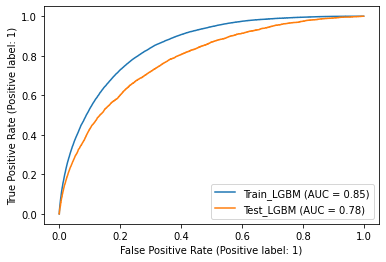

In [ ]:
from sklearn.metrics import plot_roc_curve
a=plot_roc_curve(LGBM1, X_train, y_train,name='Train_LGBM') 
b=plot_roc_curve(LGBM1, X_test, y_test,ax=a.ax_,name='Test_LGBM') 
plt.show()

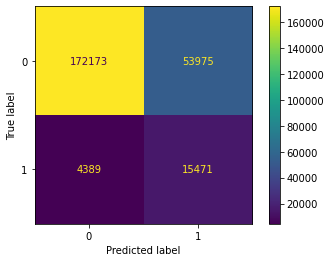

In [ ]:
# plot confusion matrix on the train dataset
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LGBM1, X_train, y_train) 
plt.show()

In [ ]:
# Important Features DataFrame
feature_imp = pd.DataFrame(sorted(zip(LGBM1.feature_importances_, X_train.columns)), columns=['Value','Feature'])
features_df = feature_imp.sort_values(by="Value", ascending=False)
selected_features = list(features_df[features_df['Value']>=1]['Feature'])

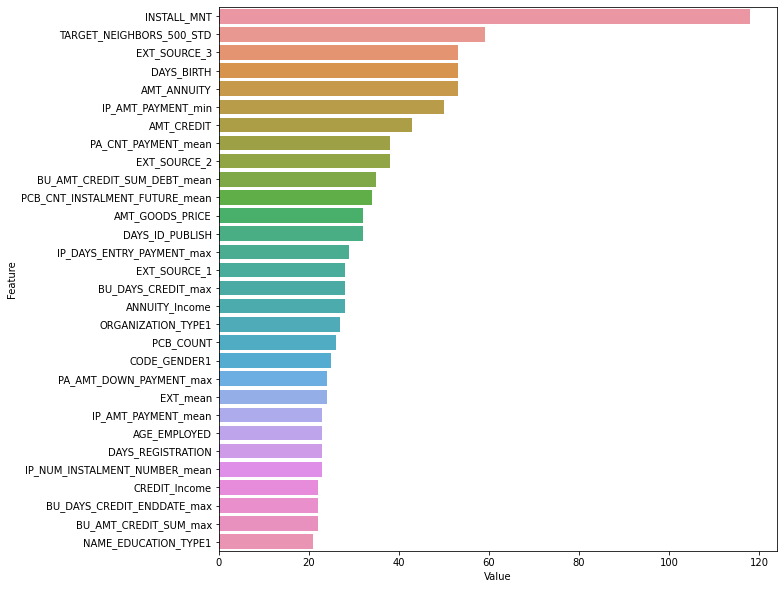

In [ ]:
#Plot top 30 important Features
plt.figure(figsize=(10,10))
sns.barplot(x="Value", y="Feature",data=features_df.iloc[:30,:30])
plt.show()

In [ ]:
len(selected_features)

359

In [ ]:
#save list of selected_features to pickle file
selected_fea = open('selected_fea', 'wb')
pickle.dump(selected_features, selected_fea)
selected_fea.close()

In [ ]:
# Filter only the selected Features
X_train1=X_train[selected_features]
X_test1=X_test[selected_features]

In [ ]:
#from sklearn.model_selection import GridSearchCV
#LGBM2=LGBMClassifier(class_weight='balanced',random_state=10,n_jobs=-1)
#parameters={'max_depth':[10,50,-1],'min_child_weight':[0.01,10,60]}
#clf1=GridSearchCV(LGBM2,parameters,cv=3,scoring='roc_auc',return_train_score=True)
#clf1.fit(X_train1,y_train)
#results1=pd.DataFrame.from_dict(clf1.cv_results_)

In [ ]:
# Fit LGBM model on selected features
LGBM3=LGBMClassifier(objective= 'binary',class_weight = {0:0.09,1:1},random_state=10,n_jobs=-1,metric='auc',reg_alpha=0.0416,reg_lambda=0.074,
                       min_split_gain=0.0223,min_child_weight=60,learning_rate= 0.2,colsample_bytree= 0.65)
LGBM3.fit(X_train1,y_train)

LGBMClassifier(class_weight={0: 0.09, 1: 1}, colsample_bytree=0.65,
               learning_rate=0.2, metric='auc', min_child_weight=60,
               min_split_gain=0.0223, objective='binary', random_state=10,
               reg_alpha=0.0416, reg_lambda=0.074)

In [ ]:
#Predict the target for the test data.
y_test_pred=LGBM3.predict_proba(X_test1)[:,1]

In [ ]:
# Calculate the ROC_AUC score on test dataset
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_test_pred)

0.782806341479037

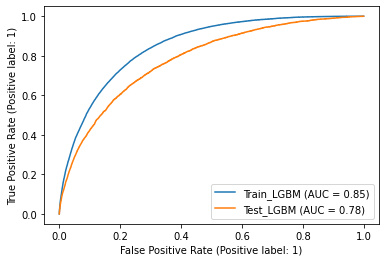

In [ ]:
#Plot ROC_AUC curve on train and test dataset
from sklearn.metrics import plot_roc_curve
a=plot_roc_curve(LGBM3, X_train1, y_train,name='Train_LGBM') 
b=plot_roc_curve(LGBM3, X_test1, y_test,ax=a.ax_,name='Test_LGBM') 
plt.show()

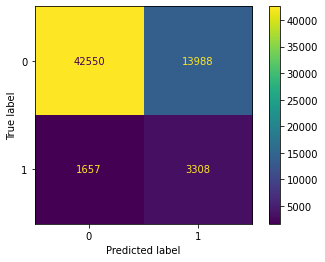

In [ ]:
# plot confusion matrix on test data 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LGBM3, X_test1, y_test) 
plt.show()

In [ ]:
# Save model to a pickle file
Model1 = open('Model1', 'wb')
pickle.dump(LGBM3, Model1)
Model1.close()